<a href="https://colab.research.google.com/github/17092003vamsi/213ECE3317/blob/main/fainal_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training shape: (245, 2090)
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5639 - loss: 0.8605 - val_accuracy: 0.8571 - val_loss: 0.2739
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7971 - loss: 0.6904 - val_accuracy: 1.0000 - val_loss: 0.0783
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8450 - loss: 0.4769 - val_accuracy: 0.9184 - val_loss: 0.1530
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8459 - loss: 0.8650 - val_accuracy: 1.0000 - val_loss: 0.0262
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8860 - loss: 0.2198 - val_accuracy: 1.0000 - val_loss: 0.0306
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9343 - loss: 0.2244 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9520 - loss: 0.1304 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9510 - loss: 0.5291 - val_accuracy: 1.0000 - val_loss: 0.0173
Ep

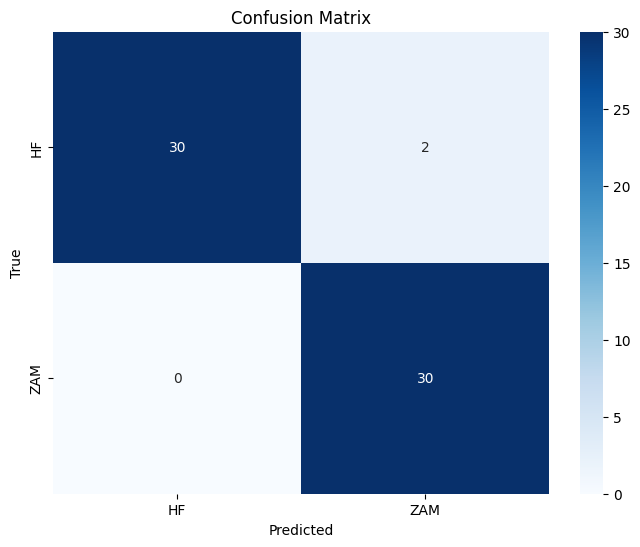

              precision    recall  f1-score   support

          HF       1.00      0.94      0.97        32
         ZAM       0.94      1.00      0.97        30

    accuracy                           0.97        62
   macro avg       0.97      0.97      0.97        62
weighted avg       0.97      0.97      0.97        62

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
!pip install shap
import shap

# Load the dataset
data = pd.read_csv("/content/COMPLETE DATA SET 2 (1).csv")  # Replace with your dataset path

# Separate features and target
X = data.drop(columns=['Type', 'Label'])  # Drop non-numeric and target columns
y = data['Label']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the training data
print(f"Training shape: {X_train_scaled.shape}")

# Define the model for 2D data input
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input shape matches number of features
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# SHAP integration: KernelExplainer for dense models and tabular data
# Use a subset of the training data as background data for SHAP
explainer = shap.KernelExplainer(model.predict, X_train_scaled[:50])  # Use first 50 samples as background data

# Compute SHAP values for the first 10 test samples
shap_values = explainer.shap_values(X_test_scaled[:10])  # Calculate SHAP values

# Plot SHAP values for the first class (global interpretation)
shap.summary_plot(shap_values, X_test_scaled[:10], feature_names=X.columns, plot_type="bar")

# Plot SHAP values for a specific prediction (individual interpretation)
shap.force_plot(explainer.expected_value, shap_values[1], X_test_scaled[10], matplotlib=True)

